In [ ]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
boston = datasets.load_boston()
#OLS=最小平方法 Ordinary least squares 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
df= pd.DataFrame(boston['data'])
df.columns = boston['feature_names']
#先把boston load 出來，然後名字也對進來

In [ ]:
Y= pd.DataFrame(boston['target'])
X = df
#指定用Boston整個資料集去當作X準備用來預測Y，Y在這個資料集中通常都用target

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=11)
#定義要隨機抽多少X跟Y來Train，然後要留多少比例來做測試，像這句的粒子就是留20%做測試，然後隨機組是42

In [ ]:
New_X_train=X_train[['CRIM', 'ZN',  'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
New_X_test=X_test[['CRIM', 'ZN',  'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
model3=sm.OLS(Y_train,New_X_train).fit()
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:                      0   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              913.3
Date:                Sat, 03 Sep 2022   Prob (F-statistic):                   4.80e-272
Time:                        02:40:47   Log-Likelihood:                         -1202.2
No. Observations:                 404   AIC:                                      2426.
Df Residuals:                     393   BIC:                                      2470.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
model = LinearRegression().fit(X_train, Y_train)
model
#定義Model =用X_train跟Y_train一起組成Model

LinearRegression()

In [ ]:
model4=LinearRegression().fit(New_X_train, Y_train)

In [ ]:
y_hat=model.predict(X_test)
#用剩餘20%的X_test去算出預測的Y_hat

In [ ]:
y_hat_train=model4.predict(New_X_test)
Eout2=((Y_test-y_hat_train)**2).sum()/len(Y_test)
Eout1=((Y_test-y_hat)**2).sum()/len(Y_test)
print(Eout2,Eout1)


0    26.616116
dtype: float64 0    26.944812
dtype: float64


In [ ]:
y_diff=(Y_test-y_hat)**2
#計算Y_hat跟實際的Y的差異(ERROR)

In [ ]:
y_diff.sum()
#把ERROR加總計算成效

0    2748.370849
dtype: float64

In [ ]:
X_train = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model2=sm.OLS(Y_train,X_train).fit()
print(model2.summary())
#P_Value(P>|t|)是coefficion，如果大於0.05就可以考慮挑調，因為它可能對這個model是不起作用的
#把AGE去掉，因為透過別的統計模組看到AGE的關聯性低

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.55
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          5.05e-109
Time:                        02:35:40   Log-Likelihood:                -1187.3
No. Observations:                 404   AIC:                             2403.
Df Residuals:                     390   BIC:                             2459.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.2265      5.709      5.470      0.0

# 在分析的時候不希望變數間彼此相關係數太高，但相關係數高不等於有相關。
coeffiction代表其他變數固定下，只要有RAD上升1房價就會上升0.3，但實際上我們沒有辦法固定變數不變。例如RAD上升的時候，相關的AGE也變高，這樣就沒有辦法再維持所謂的其他變數不變。
簡單來說，可以相關度大於0.9的時候就會把他刪掉，避免模型影響太大。

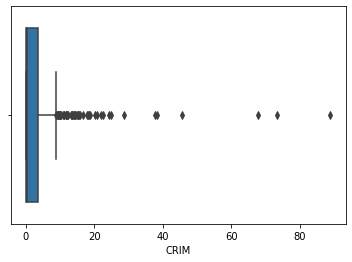

In [ ]:
#先用describe看看資料集裡面有沒有離群的情況。用標準茶跟最大值比較一夏
#先做EDA，然後跑跑不同數值之間的SCOTTPLOT，也會很常把CORRELATION都列出來  DF.CORR()
#主要是做出來後還會想要探討有沒有機會降低ERROR

sns.boxplot(x=X_train['CRIM'])



In [ ]:
X_train[X_train['CRIM']>60]

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
418,1.0,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
405,1.0,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98
380,1.0,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21


In [ ]:
X_train.describe()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.0,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,1.0,3.523429,11.310644,11.055248,0.069307,0.550819,6.27404,67.690842,3.856292,9.462871,404.948020,18.461881,358.057079,12.514158
std,0.0,8.703673,23.377964,6.800412,0.254290,0.115445,0.69354,28.087409,2.123878,8.681066,167.947779,2.130432,89.364772,7.080678
min,1.0,0.006320,0.000000,0.460000,0.000000,0.385000,3.86300,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,1.0,0.079980,0.000000,5.190000,0.000000,0.448000,5.88300,43.250000,2.124125,4.000000,279.000000,17.400000,375.997500,6.907500
50%,1.0,0.229480,0.000000,9.125000,0.000000,0.524000,6.19850,76.250000,3.346000,5.000000,330.000000,18.950000,392.010000,11.310000
75%,1.0,3.543427,12.500000,18.100000,0.000000,0.624000,6.62050,93.375000,5.234500,24.000000,666.000000,20.200000,396.157500,16.447500
max,1.0,88.976200,95.000000,27.740000,1.000000,0.871000,8.72500,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [ ]:
norad_train= X_train[['CRIM', 'ZN',  'CHAS', 'NOX', 'RM', 'DIS',  'TAX',
       'PTRATIO', 'B', 'LSTAT']]
norad_test= X_test[['CRIM', 'ZN',  'CHAS', 'NOX', 'RM', 'DIS',  'TAX',
       'PTRATIO', 'B', 'LSTAT']]

In [ ]:
model4=sm.OLS(Y_train,norad_train).fit()
y_hat_a=model4.predict(norad_test)
y_hat_train=model4.predict(norad_test)
Einnorad = ((Y_train-y_hat_train)**2).sum()/len(Y_train)
Eoutnorad = ((Y_test-y_hat_a)**2).sum()/len(Y_test)
print(model4.summary())


                                 OLS Regression Results                                
Dep. Variable:                      0   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              990.3
Date:                Sat, 03 Sep 2022   Prob (F-statistic):                   3.61e-272
Time:                        04:19:15   Log-Likelihood:                         -1205.5
No. Observations:                 404   AIC:                                      2431.
Df Residuals:                     394   BIC:                                      2471.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------